In [ ]:
!git clone https://github.com/omerbsezer/LSTM_RNN_Tutorials_with_Demo.git

Cloning into 'LSTM_RNN_Tutorials_with_Demo'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 296.50 KiB | 5.93 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Activation, Dropout
import time

**Dataset Preparation**

In [ ]:
#Dataset Preparation
input_file="/content/LSTM_RNN_Tutorials_with_Demo/StockPricesPredictionProject/DIS.csv"
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
np.random.seed(5)

# load the dataset
df = read_csv(input_file, header=None, index_col=None, delimiter=',')

In [ ]:
df.head(5)

,0,1,2,3,4,5,6
0,1996-12-31,23.011177,23.175543,22.805719,22.928993,17.804647,2719200
1,1997-01-02,22.928993,22.970085,21.942801,22.148258,17.198397,8115400
2,1997-01-03,22.394806,22.805719,22.394806,22.764629,17.677013,4650000
3,1997-01-06,22.764629,22.928993,22.559172,22.682446,17.613201,3623300
4,1997-01-07,22.682446,22.682446,22.435898,22.641354,17.581289,3606200


In [ ]:
# take close price column[5]
all_y = df[5].values
dataset=all_y.reshape(-1, 1)

In [ ]:
dataset.shape

(5035, 1)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
print(train.shape)
print(test.shape)

(2517, 1)
(2518, 1)


In [ ]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX

array([[0.06413303, 0.05843065, 0.0629325 , ..., 0.12475995, 0.12460893,
        0.12340048],
       [0.05843065, 0.0629325 , 0.06233229, ..., 0.12460893, 0.12340048,
        0.12098349],
       [0.0629325 , 0.06233229, 0.06203212, ..., 0.12340048, 0.12098349,
        0.12294722],
       ...,
       [0.16026623, 0.15799159, 0.15445329, ..., 0.21459026, 0.21987058,
        0.2177414 ],
       [0.15799159, 0.15445329, 0.15790732, ..., 0.21987058, 0.2177414 ,
        0.21586766],
       [0.15445329, 0.15790732, 0.1594238 , ..., 0.2177414 , 0.21586766,
        0.21484576]])

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
print(trainX.shape)
print(testX.shape)

(2276, 1, 240)
(2277, 1, 240)


Epoch 1/1000
10/10 [==============================] - 2s 5ms/step - loss: 0.0015
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 9.2646e-04
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 6.2633e-04
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 4.5670e-04
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 3.6504e-04
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 3.3137e-04
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 2.8529e-04
Epoch 8/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.5352e-04
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.5247e-04
Epoch 10/1000
10/10 [==============================] - 0s 5ms/step - loss: 2.3850e-04
Epoch 11/1000
10/10 [==============================] - 0s 8ms/step - loss: 2.1588e-04
Epoch 12/1000
10/10 [==============================] - 0s 5ms/step 

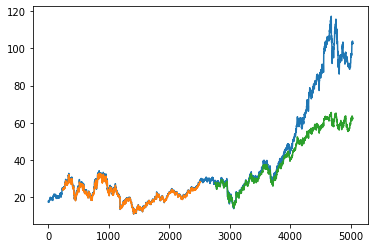

In [ ]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

print('testPredictions:')
print(testPredict)


# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()